In [6]:
# 1 a// Doc du lieu vao file hien thi 5 dau dau tien va 5 dong ngau nhien
import pandas as pd
df = pd.read_excel('zipdata.xlsx')
# Hiển thị 5 dòng đầu tiên
df.head(5)
# Hiển thị 5 dòng ngẫu nhiên
df.sample(5)
# Kich thuoc df, do dong df, so cot df

,DT,Thời hạn,Loại đất,Mặt tiền,Ngay
2,40.0,5,1,40,2020-03-21
5,3000.0,30,1,45,2020-03-21
4,1000.0,35,2,90,2020-03-21
3,23.0,10,1,67,2020-03-21
0,167.0,10,1,15,2020-03-21


In [7]:
df.size

30

In [8]:
dong, cot = df.shape
dong, cot

(6, 5)

In [9]:
# Thong ke tong so lo dat nong nghiep va so lo dat khong thoi han va ve bieu do pie minh hoa
count_datnongnghiep = df[df['Loại đất'] == 1].shape[0]
count_datnongnghiep

4

In [10]:
#In ra gia tri thong ke trung binh, dien tich cac lo dat co thoi han tren 10 nam 
mean_dientich = df[df['Thời hạn'] > 10]['DT'].mean()
mean_dientich

np.float64(2000.0)

In [11]:
# 2// Them them cot tien gia lô đất ( Tiền giá đất)  như sau 
# Đất nông nghiệp giá trị lô đất = DT *2 ; Đất kh xác định thời hạn giá trị lô đất = DT * tiền mặt ^2 
# Đất kh có thời hạn: ghi "Không xác định giá trị"

In [12]:
# Giả sử có các cột 'Loại đất' (để xác định loại đất) và 'DT' (diện tích)
def calculate_land_value(row):
    if row['Loại đất'] == 1:
        return row['DT'] * 2
    elif row['Loại đất'] == 2:
        return 'Không xác định giá trị'
    else:
        return row['DT'] * (row['Mặt tiền'] ** 2)  # Giả sử có cột 'Mặt tiền'

# Thêm cột 'Tiền giá lô đất'
df['Tiền giá lô đất'] = df.apply(calculate_land_value, axis=1)

In [13]:
df.head(5)

,DT,Thời hạn,Loại đất,Mặt tiền,Ngay,Tiền giá lô đất
0,167.0,10,1,15,2020-03-21,334.0
1,200.0,2,2,20,2020-03-21,Không xác định giá trị
2,40.0,5,1,40,2020-03-21,80.0
3,23.0,10,1,67,2020-03-21,46.0
4,1000.0,35,2,90,2020-03-21,Không xác định giá trị


In [14]:
# 3// Chèn thêm cột chuyển đổi đất (Chuyển đổi): 
# Diện tích * 15 (tr), trong đó chỉ có đất nông nghiệp (Loại đất 1), 
# các loại đất khác thì ghi chưa có công văn, hãy trích ra các loại đất được phép chuyển đổi
df['Chuyển đổi']  = df.apply(lambda row: row['DT'] * 15000000 if row['Loại đất'] == 1 else 'Chưa có công văn', axis=1)
dff = df[df['Chuyển đổi'] != 'Chưa có công văn']
dff.head(5)


,DT,Thời hạn,Loại đất,Mặt tiền,Ngay,Tiền giá lô đất,Chuyển đổi
0,167.0,10,1,15,2020-03-21,334.0,2505000000.0
2,40.0,5,1,40,2020-03-21,80.0,600000000.0
3,23.0,10,1,67,2020-03-21,46.0,345000000.0
5,3000.0,30,1,45,2020-03-21,6000.0,45000000000.0


In [15]:
#4 Giả sử diện tích có phân phối chuẩn, Hãy xây dựng hàm tính mật độ xác xuất
# Vẽ biểu đồ phân phối chuẩn cho diện tích , tinh chỉnh xlim, ylim 
# cho biết bao nhiêu phần trăm lô đất có diện tích dưới 120m*2

Tỷ lệ phần trăm lô đất có diện tích dưới 120 m²: 29.80%


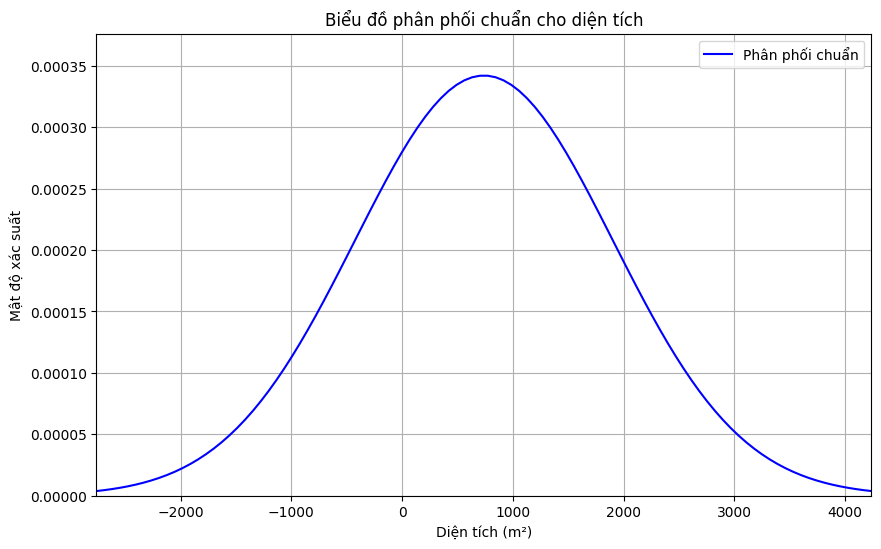

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

# Tính trung bình và độ lệch chuẩn cho diện tích
mean_dt = df['DT'].mean()
std_dt = df['DT'].std()

# Hàm tính mật độ xác suất
def probability_density(x):
    return norm.pdf(x, mean_dt, std_dt)

# Tạo dữ liệu cho biểu đồ
x = np.linspace(mean_dt - 3*std_dt, mean_dt + 3*std_dt, 100)
y = probability_density(x)

# Vẽ biểu đồ phân phối chuẩn
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Phân phối chuẩn', color='blue')
plt.title('Biểu đồ phân phối chuẩn cho diện tích')
plt.xlabel('Diện tích (m²)')
plt.ylabel('Mật độ xác suất')
plt.xlim([mean_dt - 3*std_dt, mean_dt + 3*std_dt])
plt.ylim([0, max(y) * 1.1])
plt.grid()

# Tính tỷ lệ phần trăm lô đất có diện tích dưới 120 m²
percent_below_120 = norm.cdf(120, mean_dt, std_dt) * 100
print(f"Tỷ lệ phần trăm lô đất có diện tích dưới 120 m²: {percent_below_120:.2f}%")

plt.legend()
plt.show()


In [23]:
# On tap phan cat chuoi nua

# Chuyen doi du lieu tu chuoi ve int
#df['ngay'] = df['Ngày cấp'].str.extract(r'(\d{2})').astype(int)
# Cắt và lấy phần ngày từ cột 'Ngày cấp'
# Chuyển đổi kiểu dữ liệu sang chuỗi và xử lý NaN
df['Ngay'] = df['Ngay'].astype(str).fillna('')
df['ngay'] = df['Ngay'].str.split('-').str[2].astype(int)
# Xoa mot cot


In [24]:
df['ngay']

0    21
1    21
2    21
3    21
4    21
5    21
Name: ngay, dtype: int64

str.split('/'): Tách chuỗi theo dấu / thành một danh sách.
str[0]: Lấy phần đầu tiên của danh sách, tức là phần ngày.
.astype(int): Chuyển đổi giá trị thành kiểu số nguyên.